In [11]:
# Feature: Years of Experience
X = [
    1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7,
    3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0,
    6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5
]
# Target: Salary
y = [
    39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189,
    63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940,
    91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872
]

In [12]:
print(len(X))
print(len(y))

30
30


In [13]:
#MSE
def MSE(X,y,m,c):
    n=len(X)
    total_error=0

    for i in range(n):
        y_pred=m*X[i]+c
        error=y[i]-y_pred
        total_error=error**2  ##error is squared to get a positive error value
    return total_error/n ##to get avg error ##loss function
    

In [14]:
#example---when m,c is 0 the loss will be huge
m=0
c=0
loss=MSE(X,y,m,c)
print(loss)

495092812.8


In [15]:
#Gradient descent 
def Gradient_Descent(X,y,m,c,learning_rate):
    n=len(X)
    dm=0
    dc=0

    for i in range(n):
        y_pred=m*X[i]+c
        error=y[i]-y_pred
        dm += -2 * X[i] * error
        dc += -2 * error
    dm=dm/n
    dc=dc/n

    m = m - learning_rate * dm
    c = c - learning_rate * dc

    return m, c
        


In [16]:
#Initialising parameters
m=0
c=0
learning_rate=0.0001
no_of_epochs=1000


for epoch in range(no_of_epochs):
    m,c=Gradient_Descent(X,y,m,c,learning_rate)
    if epoch % 1000==0:
        loss=MSE(X,y,m,c)
        print(f"Epoch {epoch} :Loss= {loss: .2f}")
        


Epoch 0 :Loss=  486858422.50


In [17]:
#make predictions
def predict(X_new):
    return [m * x + c for x in X_new]

# Example: predict salary for 3, 5, 7 years
X_test = [3, 5, 7]
y_pred = predict(X_test)

for x, y_p in zip(X_test, y_pred):
    print(f"{x} years → ${y_p:.2f}")


3 years → $41425.01
5 years → $67098.21
7 years → $92771.41


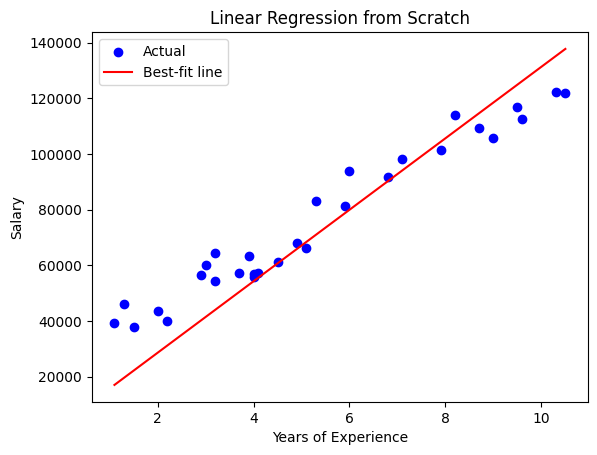

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, predict(X), color='red', label='Best-fit line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression from Scratch")
plt.legend()
plt.show()
